In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier








In [4]:
# load the dataset 
dataset=pd.read_csv("D:\ML\ML Assignment\Food_Delivery_Time_Prediction.csv")
df=pd.DataFrame(dataset)

# Handle values
print(df.head())
print(df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())
print(df[df['Distance'] <= 0])   # distance can't be zero or negative

  Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   

  Weather_Conditions Traffic_Conditions  Delivery_Person_Experience  \
0              Rainy             Medium                           4   
1             Cloudy             Medium                           8   
2              Snowy             Medium                           9   
3             Cloudy                Low                           2   
4              Rainy               High                           6   

  Order_Priority Order_Time Vehicle_Type  Restaurant_Rating  Customer_Rating  \
0         Medium  Afternoon          Car                4.1 

In [5]:
# Encode categorical
data=df[['Order_ID',
'Customer_Location',
'Restaurant_Location',
'Weather_Conditions',
'Traffic_Conditions',
'Order_Priority',
'Order_Time',
'Vehicle_Type']]

le=LabelEncoder()

for col in data:
    df[col] = le.fit_transform(df[col])

print(df[data.columns])

     Order_ID  Customer_Location  Restaurant_Location  Weather_Conditions  \
0           0                 98                   10                   1   
1           1                 73                   50                   0   
2           2                 79                  163                   2   
3           3                160                  107                   0   
4           4                 65                   71                   1   
..        ...                ...                  ...                 ...   
195       195                117                  133                   0   
196       196                189                  106                   2   
197       197                 58                   32                   2   
198       198                  1                  153                   1   
199       199                141                  181                   2   

     Traffic_Conditions  Order_Priority  Order_Time  Vehicle_Type  
0      

In [6]:
#Normalize 
scaler=StandardScaler()
df[['Distance', 'Delivery_Time']] = scaler.fit_transform(df[['Distance', 'Delivery_Time']])
print(df['Distance'])

0     -1.454738
1      1.439192
2     -0.666417
3      0.335835
4     -0.700119
         ...   
195    1.805512
196   -0.792431
197    1.335157
198    1.840679
199   -0.339659
Name: Distance, Length: 200, dtype: float64


In [7]:
# Feature Engineering:
print(df.columns)
median_time=df['Delivery_Time'].median()
print(median_time)
df['delivery_status']=df['Delivery_Time'].apply(lambda x:1 if x> median_time else 0)



Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')
0.07662482028384994


In [8]:
print(df.info)
print(df.columns)
x=df[['Delivery_Time']]
y=df['delivery_status']# target

<bound method DataFrame.info of      Order_ID  Customer_Location  Restaurant_Location  Distance  \
0           0                 98                   10 -1.454738   
1           1                 73                   50  1.439192   
2           2                 79                  163 -0.666417   
3           3                160                  107  0.335835   
4           4                 65                   71 -0.700119   
..        ...                ...                  ...       ...   
195       195                117                  133  1.805512   
196       196                189                  106 -0.792431   
197       197                 58                   32  1.335157   
198       198                  1                  153  1.840679   
199       199                141                  181 -0.339659   

     Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  \
0                     1                   2                           4   
1            

In [9]:
# naive bayes

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Model=GaussianNB()
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc) 



0.975


In [10]:

print(df.columns)
a=df[["Distance"]]
b=df[["delivery_status"]]

X_train,X_test,Y_train,Y_test=train_test_split(a,b,test_size=0.3,random_state=42)

Model=KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train,Y_train)
pred=Model.predict(X_test)
ac=accuracy_score(Y_test,pred)
print(pred)
print(Y_test)
print(ac)

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'delivery_status'],
      dtype='object')
[0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
     delivery_status
95                 1
15                 0
30                 1
158                1
128                0
115                0
69                 1
170                1
174                1
45                 0
66                 0
182                0
165                1
78                 0
186                0
177                1
56                 0
152                1
82                 0
68                 0
124                0
16                 0
148                0
93                 0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


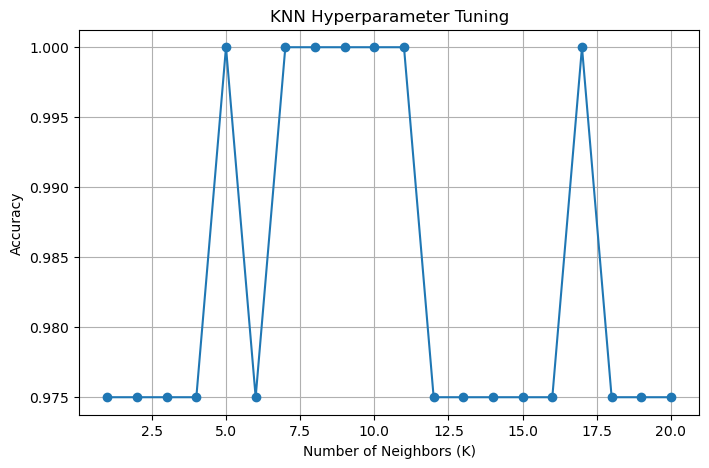

In [11]:
k_values = range(1, 21)
accuracies = []

# Train and evaluate KNN for each K
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot K vs Accuracy
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Hyperparameter Tuning')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
print(df.columns)


features=df[["Distance"]]
Target=df[["delivery_status"]]
print(df["delivery_status"])

print(len(features))
print(len(Target))
a_train,a_test,b_train,b_test=train_test_split(features,Target,test_size=0.2)


Dtmodel=DecisionTreeClassifier(random_state=42)
Dtmodel.fit(a_train,b_train)
Result=Dtmodel.predict(a_test)
print(Result)
print(df["delivery_status"])

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount', 'delivery_status'],
      dtype='object')
0      0
1      0
2      0
3      1
4      0
      ..
195    0
196    1
197    1
198    0
199    1
Name: delivery_status, Length: 200, dtype: int64
200
200


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.